In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML 
import seaborn as sns


# Wstęp do machine learningu

<div>
<img src="http://ema.drwhy.ai/figure/MDP_washmachine.png" width="500" style="float:middle"/>
</div>

Narzędzia do tworzenia modeli ML:
- R: dużo różnych pakietów, ale istnieją frameworki, które ujednolocają interfejs: [mlr3](https://mlr3.mlr-org.com/), [tidymodels](https://www.tidymodels.org/)
- Python: biblioteka [sklearn](https://scikit-learn.org/stable/supervised_learning.html) (dla modeli klasycznych), Keras, PyTorch dla modeli głębokich

## Supervised learning


### Regresja - regression



Zmienna odpowiedzi ma charakter ciągły, może przyjmować wartość liczbową: rzeczywiste lub naturalne ($y \in \mathbf{R}$).

Przykłady:
- predykcja ceny mieszkania
- predykcja wzrostu osób


In [2]:
from sklearn import datasets
diabetes, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: xlabel='target', ylabel='Count'>

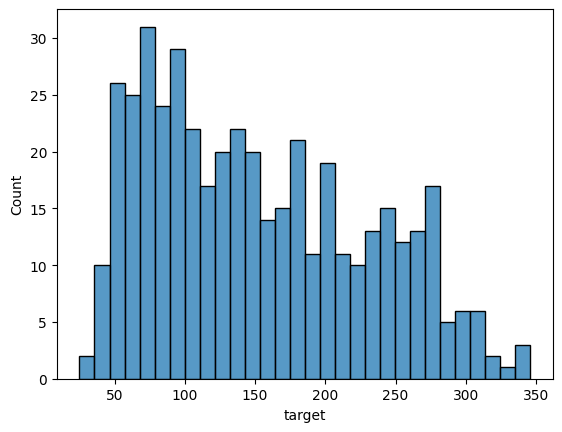

In [3]:
sns.histplot(diabetes_y,bins = 30)


### Klasyikacja binarna - classification


W przypadku klasyfikacji binarnej zmienna odpowiedzi może przyjmować dwie wartości, $y \in \{0,1\}$.


In [4]:
breast_cancer, breast_cancer_y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
breast_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='target', ylabel='Count'>

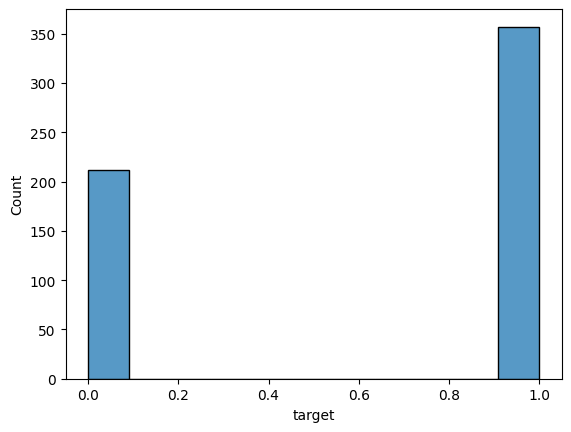

In [5]:
sns.histplot(breast_cancer_y)


### Klasyfikacja wieloetykietowa


In [6]:
iris, iris_y = datasets.load_iris(return_X_y=True, as_frame=True)
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
## unikalne zmiennej Y
iris_y.value_counts()


0    50
1    50
2    50
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='Count'>

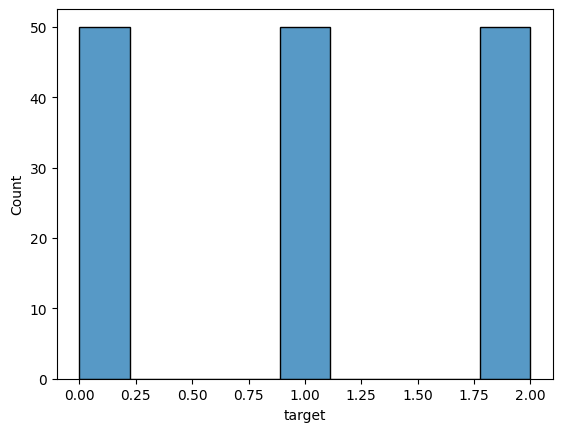

In [8]:
sns.histplot(iris_y)


## Data preprocessing

Ten krok ma na celu poznanie zależności pomiędzy zmiennymi objaśniającymi i zmienną objaśnianą, a także pomiędzy zmiennymi objaśniającymi.

ZADANIE 

Wymień możliwe operacje:
- ...
- ...


## Train and test split

In [9]:
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
print('X: \n', X)

print('y: ', list(y))


X: 
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y:  [0, 1, 2, 3, 4]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X train: \n', X_train, '\n y train:', y_train)
print('X test: \n', X_test, '\n y train:', y_test)


X train: 
 [[4 5]
 [0 1]
 [6 7]] 
 y train: [2, 0, 3]
X test: 
 [[2 3]
 [8 9]] 
 y train: [1, 4]


In [11]:
## podział zbioru do regresji i klasyfikacji
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes, diabetes_y, test_size=0.33, random_state=42)
print('Liczba obserwacji w zbiorze treningowym:', diabetes_X_train.shape[0])
print('Liczba obserwacji w zbiorze testowym:', diabetes_X_test.shape[0])

print('Liczba zmiennych w modelu:', diabetes_X_train.shape[1])


Liczba obserwacji w zbiorze treningowym: 296
Liczba obserwacji w zbiorze testowym: 146
Liczba zmiennych w modelu: 10


In [12]:
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(breast_cancer, breast_cancer_y, test_size=0.33, random_state=42)
print('Liczba obserwacji w zbiorze treningowym:', cancer_X_train.shape[0])
print('Liczba obserwacji w zbiorze testowym:', cancer_X_test.shape[0])

print('Liczba zmiennych w modelu:', cancer_X_train.shape[1])


Liczba obserwacji w zbiorze treningowym: 381
Liczba obserwacji w zbiorze testowym: 188
Liczba zmiennych w modelu: 30


## Training ML models


Algorytmy uczenia maszynowego znajdują zależności między zmiennymi objaśniającymi a zmienną objaśnianą, czyli pomiędzy `X` i `y`.

Proces uczenia - metoda `fit(X, y)` :
1. Znalezienie zależności pomiędzy zmiennymi a `y`. Postać tej zależności jest zadana przez rodzaj wybranego algorytmu.
2. Algorytm ocenia jakość znalezionej zależności poprzez funkcję celu.
3. (Zależne od algorytmu i iteracyjne) Algorytm na podstawie uzyskanej informacji o błędzie wprowadza poprawki do etapu szukania zależności i powtarza krok 1. i 2.

Proces predykcji dla nowych danych - metoda `predict(X)`.


![models_comparison](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

## Modele liniowe

Zakładamy, że zmienną objaśnianą możemy wyrazić jako funkcję $f$ kombinacji liniowejzmiennych objaśnianych.

$$ y_i = f(\alpha + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}) $$

W zapisie macierzowym $y = f(\boldsymbol{\beta} X  + \alpha )$.

Funkcja f może mieć różną postać najczęściej to f jest funkcją identycznościową albo funkcja logistyczna.


### Regresja liniowa


Wykorzystywana w problemach regresji, szczególnie tam gdzie nie ma nałożonych ograniczeń na wartość predykc

$$ y_i = \alpha + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} $$


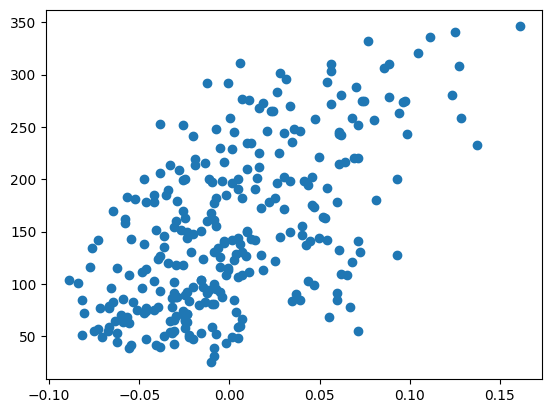

In [13]:
from sklearn.linear_model import LinearRegression

diabetes_one_col = pd.DataFrame(diabetes_X_train.iloc[:,2])
plt.scatter(diabetes_one_col, diabetes_y_train)


In [14]:
regr = LinearRegression(fit_intercept=True)
regr.fit(diabetes_one_col, diabetes_y_train)


LinearRegression()

In [15]:
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [972.87627375]


(array([19., 37., 66., 69., 35., 33., 21.,  9.,  5.,  2.]),
 array([ 63.48455927,  87.8115641 , 112.13856892, 136.46557375,
        160.79257858, 185.1195834 , 209.44658823, 233.77359306,
        258.10059788, 282.42760271, 306.75460754]),
 <BarContainer object of 10 artists>)

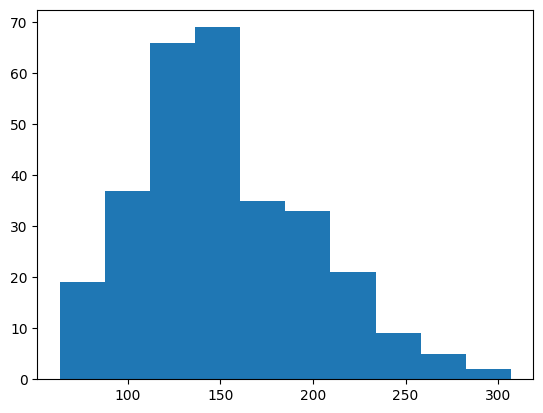

In [16]:
pred_diabetes_y = regr.predict(pd.DataFrame(diabetes_one_col))
plt.hist(pred_diabetes_y)


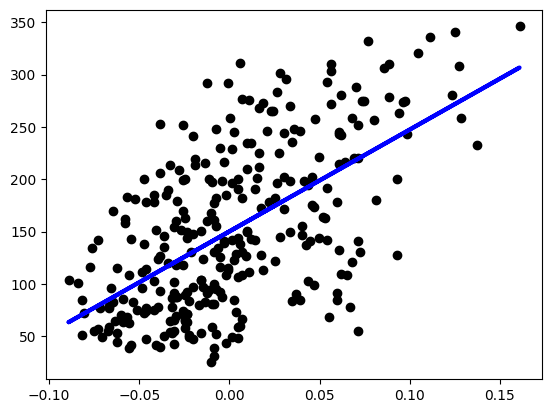

In [17]:
plt.scatter(diabetes_one_col, diabetes_y_train,  color='black')
plt.plot(diabetes_one_col, pred_diabetes_y, color='blue', linewidth=3)


plt.show()


### Regresja dla większej liczby zmiennych

In [18]:
regr_multi = LinearRegression()
regr_multi.fit(diabetes_X_train, diabetes_y_train)
print('Coeffifients:', regr_multi.coef_)
print('Intercept:', regr_multi.intercept_)


Coeffifients: [  32.14928032 -242.82449076  559.98996952  407.63766881 -718.69857577
  396.63703933   10.432395    171.81955335  627.07993787  -21.62312454]
Intercept: 150.43401223157832


### Ridge i LASSO

Zwykła regresja liniowa nie zależy od żadnych hiperparametrów wejściowych.

Istnieją warianty regresji liniowej związane z regularyzacją (kontrolą wielkości współczynników) i selekcją zmiennych - [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) i [LASSO](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso). 

Ridge powoduje *ściąganie współczynników do zera* a LASSO *wybiera* zmienne.
Moc regularyzacji zależy od hiperparametru `alpha`.


Algorytm regresji liniowej [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) 
jest kombinacją Ridge + LASSO i zależy od dwóch hiperparametrów `alpha` i `l1_ratio`.


### Regresja logistyczna

Najbardziej tradycyjne podejście do problemu klasyfikacji.



<Axes: xlabel='target', ylabel='Count'>

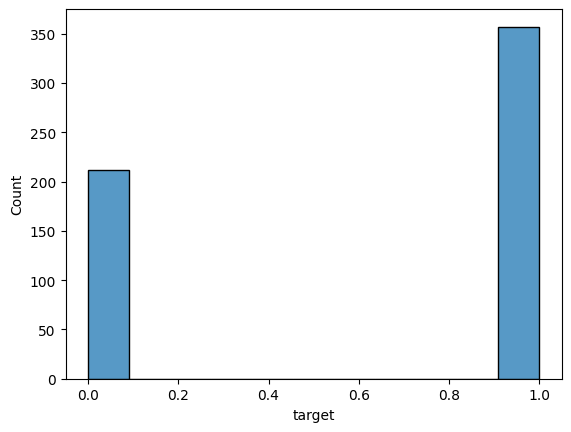

In [19]:
sns.histplot(breast_cancer_y)


Jedną z motywacji jest to, że chcemy przewidzieć prawdopodobieństwo przynależności do klasy 1 zatem predykcja modelu powinna spełniać $0 \leq f(x) \leq 1$.

Jednym z przykładów funkcji, która spełnia takie ograniczenie jest funkcja logistyczna
$$ f(x) = \frac{e^x}{1+e^x}$$

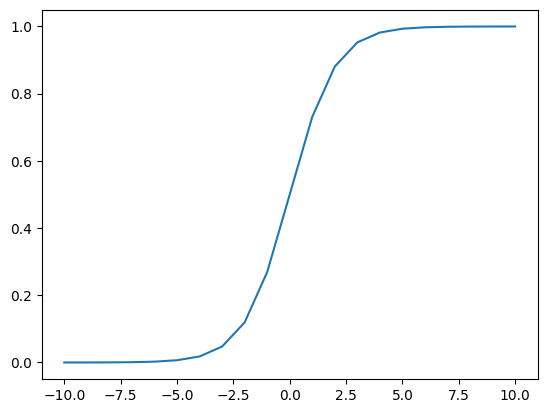

In [20]:
x = np.arange(-10, 11)
y = 1/(1+np.exp(-x))
plt.plot(x, y, '-')
plt.show()


W algorytmie regresji logistycznej zakładamy,że prawdopodobieństwo przynależności do klasy `pozytywnej` jest funkcją logistyczną kombinacji liniowej zmiennych objaśniających.

$$ \hat{P}(Y=1|X=x) = \frac{\exp(\alpha + \beta_1 x_1 + \beta_2 x_2 + \ldots +  \beta_p x_p )}{1+\exp(\alpha + \beta_1 x_1 + \beta_2 x_2 + \ldots +  \beta_p x_p )}$$

$$ \hat{P}(Y=0|X=x)= \frac{1}{1+\exp(\alpha + \beta'x)} $$

W procesie trenowanie modelu obliczane są współczynniki: $\beta = (\beta_1, ..., \beta_p)$ i $\alpha$.


W wyniku predykcji otrzymujemy prawdopodbieństwo klasy `pozytywnej` lub konkretną klasę jeśli ustalimy punkt odcięcia (threshold).

Istnieją warianty Ridge, LASSO i ElasticNet zaszyte w hiperparametrze `penalty`. Hiperparametr `C` jest odpowiednikiem `alpha`.


In [21]:
from sklearn.linear_model import LogisticRegression
?LogisticRegression


Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [22]:
log_reg = LogisticRegression(penalty = 'l2', max_iter = 200)
log_reg.fit(cancer_X_train, cancer_y_train)
log_reg.predict(cancer_X_test)


/home/uxeruses/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [23]:
log_reg.predict_proba(cancer_X_test)[:10,:]


array([[1.57562227e-01, 8.42437773e-01],
       [9.99999998e-01, 1.70134966e-09],
       [9.97817303e-01, 2.18269713e-03],
       [5.22705338e-03, 9.94772947e-01],
       [1.04418931e-03, 9.98955811e-01],
       [1.00000000e+00, 1.39957225e-10],
       [1.00000000e+00, 2.19371513e-13],
       [9.91710324e-01, 8.28967614e-03],
       [1.65153825e-03, 9.98348462e-01],
       [1.54707952e-02, 9.84529205e-01]])

### KNN- k najbliższych sąsiadów


Przewidywanie klasy nowej obserwacji na podstawie $k$ najbliższych obserwacji z próby uczącej. Stosowana jest reguła większościowa.

![](image/kknn_1.png)
![](image/kknn_15.png)

W różny sposób możemy określać odległość między obserwacjami (wybór metryki-`metric`), różną liczbę sąsiadów możemy brać pod uwagę.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
?KNeighborsClassifier


Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [25]:
knn_cf = KNeighborsClassifier()
knn_cf.fit(cancer_X_train, cancer_y_train)


KNeighborsClassifier()

In [26]:
knn_cf.predict(cancer_X_test)
knn_cf.predict_proba(cancer_X_test)


array([[0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. ,

### Support vector machine (SVM)

Chcemy znaleźć najlepiej płaszczyznę najlepiej rozdzielającą obserwacje należące do różnych klas. Chcemy maksymalizować odległość obserwacji od tej płaszczyzny, a równocześnie każemy za popełnione błędy.

![](image/svm_01.png)
![](image/svm_02.png)

Isnieje też rozszerzenie tej metody, w której dane  poddawane są przekształceniom zdefiniowanym przez hiperparametr `kernel`.


Hiperparametry:
* `kernel` - rodzaj przekształcenia, 
* `gamma` - dodatkowy parametr związany z przekształceniem zdefiniowanym przez `kernel`, 
* `C` - parametr kary za błędy.

In [27]:
from sklearn.svm import SVC
?SVC


Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

![](https://miro.medium.com/max/3000/1*gtF6KeL7b9zNHd7pXtC1Nw.png)

### Drzewa decyzyjne

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.25, 0.5, 'x[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.75, 0.5, 'x[22] <= 90.38\ngini = 0.182\nsamples = 148\nvalue = [133, 15]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.108\nsamples = 140\nvalue = [132, 8]')]

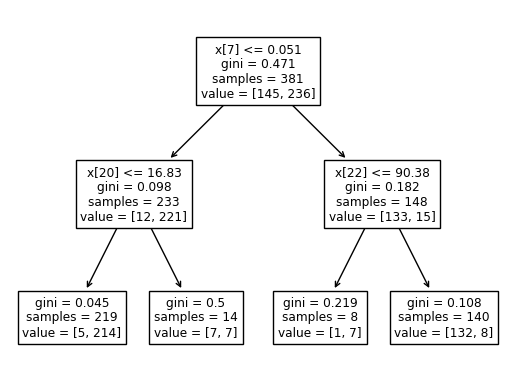

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(cancer_X_train, cancer_y_train)

plot_tree(decision_tree)


#### Jak tworzone jest drzewo decyzyjne?


$m$ - rodzic, $m_L$ - lewe dziecko, $m_R$ - prawe dziecko 

$Q_m$ - miara różnorodności dla $m$ (Gini, entropia)

$\hat{p}_L$ - liczba obserwacji w węźle $m_L$ dzielona przez liczbę obserwacji w węźle $m$, analogicznie $\hat{p}_R$

$$ \Delta Q_{m, m_L, m_R} = Q_m - (\hat{p}_LQ_{m_L} + \hat{p}_RQ_{m_R})$$

Chcemy tak wybierać podziały, żeby maksymalizować $\Delta Q_{m, m_L, m_R}$.

Predykcja w ostatnim weźle (liściu) jest robiona na podstawie 
- reguły większościowej dla klasyfikacji
- średnia dla regresji

Hiperparametry:

- na jakim poziomie skoćczyć dzielenie:
    * `min_samples_split` - the minimum number of observations that must exist in a node in order for a split to be attempted
    * `max_depth` - maksymalna głebokość drzewa
    * `ccp_alpha` - parametr przycinania
- na podstawie jakiego kryterium (gini lub information)
- ile zmiennych brać pod uwagę przy szukaniu nowego podziału

$T$ - drzewo
$R(T)$ - frakcja obserwacji, które źle zaklasyfikowaliśmy
$cp = \alpha$
$$ R_{\alpha}(T) = R(T) + \alpha |T| $$


In [29]:
?DecisionTreeClassifier


Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_001.png)

### Lasy losowe - random forest

Lasy losowe są przykładem komitetu klasyfikatorów. Polegają na niezależnym tworzeniu `n_estimators` drzew decyzyjnych. 
Z każdego drzewa decyzyjnego otrzymujemy predykcję. Ostateczna predykcja jest średnią wszystkich predykcji.

Algorytm ten dziedziczy większość hiperparametrów po drzewach decyzyjnych.

Las losowy może być budowany na całych dostępnych danych treningowych lub na wylosowanej podpróbie ze zwracaniem (`bootstrap=True`).

![](https://www.kdnuggets.com/wp-content/uploads/rand-forest-2.jpg)


In [30]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
?RandomForestClassifier


Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [31]:
rf_cf = RandomForestClassifier()

rf_cf.fit(cancer_X_train, cancer_y_train)
predicted_proba_y_test_rf = rf_cf.predict_proba(cancer_X_test)
predicted_class_y_test_rf = rf_cf.predict(cancer_X_test)


### Gradient boosting

![](https://miro.medium.com/max/3908/1*FoOt85zXNCaNFzpEj7ucuA.png)

Gradient boosting jest przykładem modelu addytywnego, złożony jest z wielu nieskomplikowanych klasyfikatorów (*weak learners*), ale nie zbudowanych niezależnie tak jak w przypadku lasów losowych, tylko budowanych iteracyjnie na rezyduach z poprzedniego modelu.

Gradient boosting o głębokości $k$ można zapisać jako:
$$ D(X) = d_1(X) + d_2(X) + \ldots + d_k(X)$$,
gdzie dla $d_{1}(X)$ zmienną odpowiedzi jest zmienna objaśniana $y$, ale dla kolejnych modeli $d_i(X)$ zmienną objaśnianą są rezydua z poprzedniego modelu. 




![](https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG)



Hiperparametry:
- `n_estimators` - liczba budowanych drzew
- `learning_rate` - waga z jaką włączane są do ostatecznej predykcji, predykcje z kolejnych drzew
- parametry związane z budową drzew

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
?GradientBoostingClassifier


Init signature:
GradientBoostingClassifier(
    *,
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` i

**XGBoost**, **CatBoost**, **LightGBM**  to inne implementacje tego algorytmu. Różnią od GBM sposobem poszukiwania podziałów w drzewach.

Nie są dostępne w sklearn. Trzeba zainstalować odpowiedni pakiet.

### Sieci neuronowe

<div>
<img src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png" width="500" style="float:middle"/>
</div>



Warstwa $[x_1, x_2, \ldots, x_n]$ to *wejście sieci neurnowej (input layer)* składa się z tylu neuronów ile zmiennych ma zbiór danych.

Warstwa $[a_1, a_2, \ldots, a_k]$ to *warstwa ukryta (hidden layer)*. Każdy neuron jest funkcją kombinacji liniowej z poprzedniej warstwy, w tym przypadku input layer.

$$ a_1 = \sigma(b_1 + w_{11} x_1 +  w_{21} x_2 + \ldots + w_{n1} x_n)$$

$w_{ij}$ to wagi sieci


$\sigma$ to funkcja aktywacji, musi być nieliniowa żeby sieć nie była po prostu regresją

Najczęściej używane funkcje aktywacji: RELU, tanh, sigmoid

![](http://rasbt.github.io/mlxtend/user_guide/classifier/NeuralNetMLP_files/neuralnet_mlp_1.png)

In [33]:
from sklearn.neural_network import MLPClassifier


In [34]:
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)


#### F1

Średnia harmoniczna precyzji i recall
$$ F_1 = 2* \frac{precision \times recall}{precision + recall}$$

In [35]:
from sklearn.metrics import f1_score
f1_score(cancer_y_test,predicted_class_y_test_rf)


0.9672131147540983

### Miary oparte na predykcji prawdopodobieństwa

#### Krzywa ROCR

Ten wykres jest funkcją punktu odcięcia - jeśli model przewidzi prawdopodobieństwo powyżej tej wartości to klasyfikujemy ją do klasy pozytywnej. Dla punktów odcięcia wyznaczne jest False Positive Rate (x) vs. True Positive Rate (y).

[Youtube](https://www.youtube.com/watch?v=4jRBRDbJemM)

In [36]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(cancer_y_test, predicted_proba_y_test_rf[:,1], pos_label=1)


In [37]:
metrics.RocCurveDisplay.from_estimator(cancer_X_test, cancer_y_test)


TypeError: RocCurveDisplay.from_estimator() missing 1 required positional argument: 'y'

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/1280px-Roc-draft-xkcd-style.svg.png" width="500" style="float:middle"/>
</div>

#### AUC 

Pole pod krzywą ROC. AUC $\in (0.5; 1]$

#### Krzywa Precision-Recall  i AUPR

Krzywa PR : wykres Recall (x) vs Precision (y).  
Oś Recall (True positive rate) taka sama jak przy krzywej ROC. W krzywej ROC jest True negative rate a w krzywe PR Precyzja.


**AUPR** - pole pod tą krzywą, AUPR $\in (0.5; 1]$.

Ważne dla niezbalansowanych danych - obie miary precision i recall patrzą na mniej liczną klasę.

## Klasyfikacja wieloetykietowa

### Accuracy 

### Micro i Macro-average score

Traktujemy każdą pojedynczą klasę $i$ jako pozytywną a pozostałe jako negatywne (One vs. All) i obliczamy dla niej metryki $TP_i, TN_i, FP_i, FN_i$.

**Micro averaged precision** - modyfikujemy wzór na precyzję i jako $TP$ bierzemy sumę $TP_i$ dla wszystkich klas itd.

$$ Precision_{micro}=  \frac{TP_i +\ldots +TP_k}{(TP_i +\ldots +TP_k) +(FP_i +\ldots +FP_k)} $$

**Macro averaged precision** - średnia precyzji dla każdej klasy
$$ Precision_i = \frac{TP_i}{TP_i+FP_i} $$


$$ Precision_{macro}=  \frac{Precision_1 +\ldots+Precision_k}{k} $$

Analogicznie powstają pozostałe miary oparte o tablicę pomyłek, a potem $F1 score$, krzywa ROC i AUC.



Więcej materiałów i kod można znaleźć [tu](https://vitalflux.com/micro-average-macro-average-scoring-metrics-multi-class-classification-python/)

## Problem generalizacji

### Podział na zbiór testowy i treningowy

### Kroswalidacja



Aby lepiej oceniać stabilność jakośni modeli na danych treningowych stosuje się kroswalidację - cały zbiór danych treningowy dzielimy na $k$ - podzbiorów. W każdej iteracji uczymy algorytm na $k-1$ podzbiorach a testujemy na pozostałym jednym zbiorze danych. 

Jako ocenę jakości modeli możemy stosować każdą z wyżej wymienionych miar.

Jeśli model jest dobrze przygotowany to błąd, który uzyskamy na zbiorze testowym (który nie był wykorzystywany w kroswalidacji) powiniem być zbliżony do średnigo błędu z kroswalidacji.

![](image/crossvalidation.png)

In [ ]:
from sklearn.model_selection import cross_validate
# parametr cv  - możemy podać liczę podzialow, albo konkretny podzial po indeksach ramki danych 
# scoring - jakiej metryki uzyc do oceny

rf_clf = RandomForestClassifier(n_estimators=10)


cv_results = cross_validate(rf_clf, cancer_X_train, cancer_y_train, cv=3)
print(cv_results.keys())

print(cv_results['test_score'])


In [ ]:
# Mozemy podawac kilka metryk, ktore beda sprawdzane na zbiorze testowym i treningowym (scoring)
# Mozemy zachowywac tez wyniki na zbiorze treningowym (return_train_score)

cv_results = cross_validate(rf_clf, cancer_X_train, cancer_y_train, cv=3, 
                            return_train_score = True,scoring =  ['accuracy', 'roc_auc'])
print(cv_results.keys())

print(cv_results['test_accuracy'])


ZADANIE

Dla przedstawionych modeli podaj listę ich hiperparametrów.

## Modelowy skrypt

In [ ]:
## wczytanie bibliotek

## wczytanie danych

## zdefiniowanie zmiennej odpowiedzi i zmiennych objasniajacych

## analiza eksploracyjna i preprocessing

## podzial na zbior testowy i treningowy

## wybor algorytmow i tuning hiperparametrow

## porownanie najlepszych modeli pomiedzy algorytmami


ZADANIE

Na danych `train.csv` wytrenuj przynajmniej 5 różnych modeli i oceń ich jakość predykcji na zbiorze `test.csv`. 
a) Który model poradził sobie najlepiej?
b) Dla najlepszego modelu spróbuj znaleźć wartość hiperparametrów, które poprawią jego jakość.